## Andrew Ingrassia
## World Happiness Report
## Exploring Relationships

***
## Contents

##### 1) Importing libraries & cleaned data

##### 2) Locating noteworthy relationships
    - 2a. Creating a heat map
    - 2b. Happiness Score vs Economic Status
    - 2c. Happiness Score vs Life Expectancy
    - 2d. Happiness Score vs Social Support
    - 2e. Happiness Score vs Freedom
    - 2f. Happiness Score vs Government Trust
    - 2g. Happiness Score vs Generosity
    - 2h. Economic Status vs Life Expectancy
    - 2i. Social Support vs Life Expectancy
    
##### 3) Creating a pair plot

##### 4) Creating variable categories
    - 4a. 'Economic Status' score categories
    - 4b. 'Life Expectancy' score categories
    - 4c. 'Social Support' score categories
    - 4d. 'Freedom' score categories
    - 4e. 'Government Trust' score categories
    - 4f. 'Generosity' score categories

##### 5) Observations
    - 5a. Regarding the 'economic_status' variable
    - 5b. Regarding the 'life_expectancy' variable
    - 5c. Regarding the 'social support' variable
    - 5d. Regarding the 'freedom' variable
    - 5e. Regarding the 'govt_trust' variable
    - 5f. Regarding the 'generosity' variable

##### 6) Hypotheses

##### 7) Organizing & exporting the modified dataframe
    

***
## 1) Importing libraries & cleaned data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

In [2]:
# Defines path to WHR data
path = r'C:\Users\ingra\OneDrive\Desktop\Data Analysis\World Happiness Report\WHR - Data'

In [3]:
# Imports the cleaned & combined WHR data (years 2015 - 2023)
df = pd.read_csv(os.path.join(path, 'whr_combined_whr1.csv'))

In [4]:
df.head()

,country,year,happiness_rank,happiness_score,economic_status,social_support,life_expectancy,freedom,generosity,govt_trust
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


***
## 2) Locating noteworthy relationships

### 2a. Creating a heat map

In [5]:
# Creates a correlation matrix using pandas and assigns it to the variable name 'correlation_matrix'
# Limits the matrix to numeric columns only

correlation_matrix = df.corr(numeric_only=True)
df.corr(numeric_only=True)

,year,happiness_rank,happiness_score,economic_status,social_support,life_expectancy,freedom,generosity,govt_trust
year,1.000000,-0.060606,0.056923,0.347407,0.010998,-0.199247,0.304392,-0.293644,0.066839
happiness_rank,-0.060606,1.000000,-0.986409,-0.715772,-0.641701,-0.657359,-0.535452,-0.098293,-0.478593
happiness_score,0.056923,-0.986409,1.000000,0.701459,0.639292,0.660673,0.548101,0.125468,0.508683
economic_status,0.347407,-0.715772,0.701459,1.000000,0.495978,0.508834,0.421731,-0.127167,0.424680
social_support,0.010998,-0.641701,0.639292,0.495978,1.000000,0.553397,0.354523,0.054227,0.216295
life_expectancy,-0.199247,-0.657359,0.660673,0.508834,0.553397,1.000000,0.204522,0.047208,0.299483
freedom,0.304392,-0.535452,0.548101,0.421731,0.354523,0.204522,1.000000,0.209850,0.469574
generosity,-0.293644,-0.098293,0.125468,-0.127167,0.054227,0.047208,0.209850,1.000000,0.234048
govt_trust,0.066839,-0.478593,0.508683,0.424680,0.216295,0.299483,0.469574,0.234048,1.000000


In [6]:
# Creates a subset of df containing only those columns represented in the above matrix (excludes 'country'  & 'year' columns)
sub = df[[
    'happiness_rank', 
    'happiness_score', 
    'economic_status', 
    'social_support', 
    'life_expectancy', 
    'freedom', 
    'generosity',
    'govt_trust'
]]

# Views the new dataframe
sub.head()

,happiness_rank,happiness_score,economic_status,social_support,life_expectancy,freedom,generosity,govt_trust
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


Text(0.5, 1.0, 'WHR Correlation Heatmap')

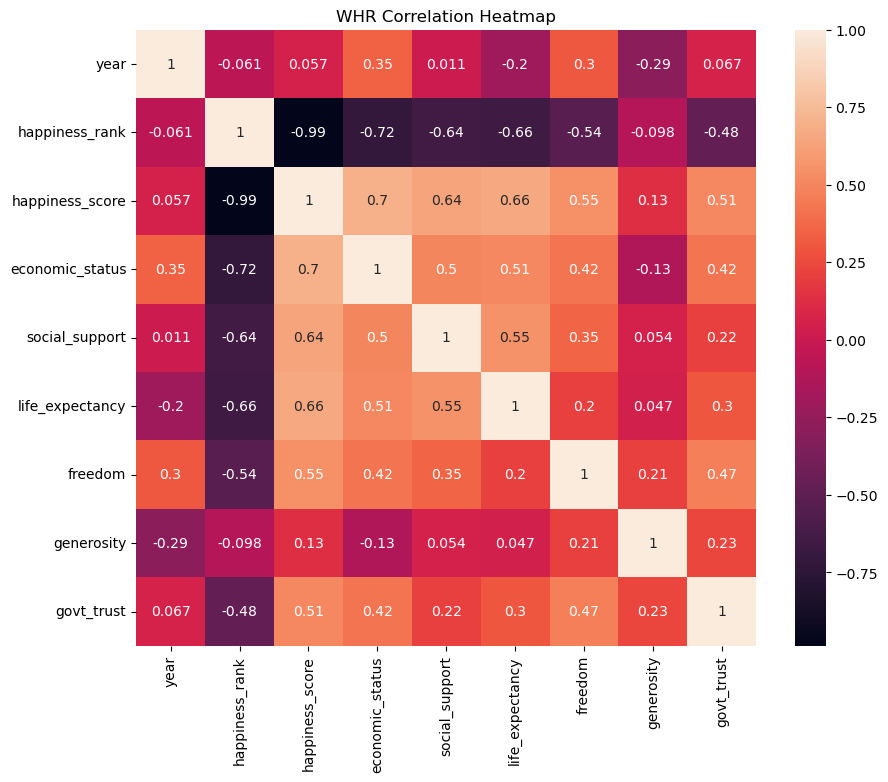

In [7]:
# Set the size of the figure (width: 10, height: 10)
plt.figure(figsize=(10, 8))

# Create a correlation heatmap:
# - 'correlation_matrix' is the previously defined matrix containing the correlation values
# - 'annot=True' adds correlation values to the cells
sns.heatmap(correlation_matrix, annot=True)

# Set the title of the plot
plt.title("WHR Correlation Heatmap")

### 2b. Happiness Score vs Economic Status

Text(0.5, 1.0, 'Effect of Economic Status on Happiness Score')

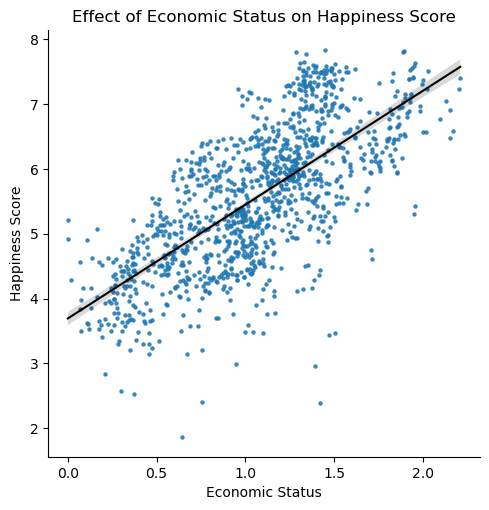

In [8]:
# Creates a scatterplot in seaborn with the 'economic_status' and 'happiness_score' variables from the 'sub' dataframe
sns.lmplot(
    x = 'economic_status',                             
    y = 'happiness_score', 
    data = sub, 
    scatter_kws={'s': 5},                              # Changes the size of the dots
    line_kws={'color': 'black', 'linewidth': 1.5}      # Changes the color and thickness of the line
)     

# Assigns plot labels
plt.xlabel('Economic Status')
plt.ylabel('Happiness Score')
plt.title('Effect of Economic Status on Happiness Score')

- Correlation coefficient = 0.7 <br><br>

- This scatterplot indicates that there is a strong positive linear relationship between a country's economic status and its happiness score <br><br>

- In other words: countries with higher GDPs per capita tend to have happier populations <br><br>

- "Economic Status" refers to a country's economic performance and prosperity, typically represented by the Gross Domestic Product (GDP) per capita

### 2c. Happiness Score vs Life Expectancy

Text(0.5, 1.0, 'Effect of Life Expectancy on Happiness Score')

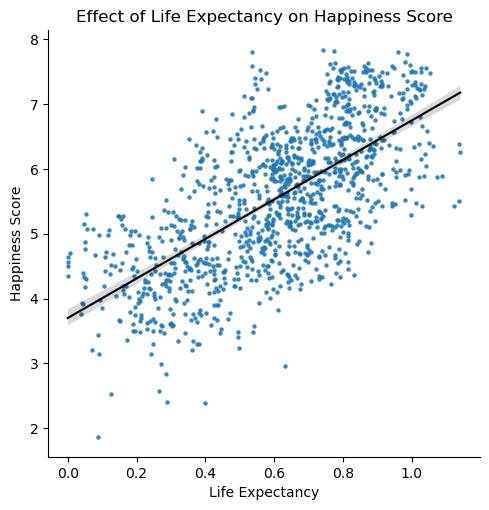

In [9]:
# Creates a scatterplot in seaborn with the 'life_expectancy' and 'happiness_score' variables from the 'sub' dataframe
sns.lmplot(
    x = 'life_expectancy', 
    y = 'happiness_score', 
    data = sub, 
    scatter_kws={'s': 5}, 
    line_kws={'color': 'black', 'linewidth': 1.5}
)

# Assigns plot labels
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.title('Effect of Life Expectancy on Happiness Score') 

- Correlation coefficient = 0.66 <br><br>

- This scatterplot indicates that there is a strong positive linear relationship between a country's life expectancy score and its happiness score <br><br>

- In other words: countries where people tend to live longer also tend to have higher levels of happiness among their populations <br><br>

- "Life Expectancy" refers to the average number of years a person can expect to live in good health, often used as an indicator of overall well-being and healthcare quality

### 2d. Happiness Score vs Social Support

Text(0.5, 1.0, 'Effect of Social Support on Happiness Score')

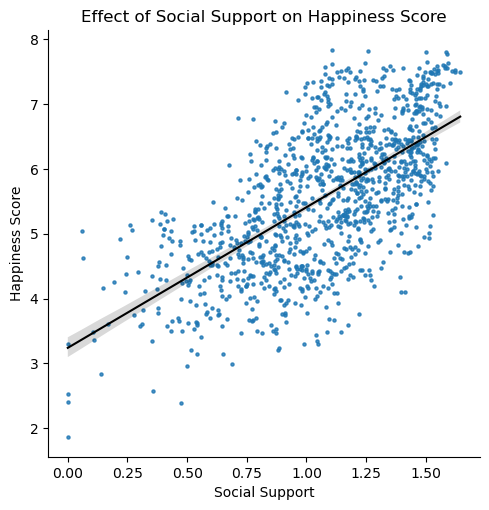

In [10]:
# Creates a scatterplot in seaborn with the 'social_support' and 'happiness_score' variables from the 'sub' dataframe
sns.lmplot(
    x = 'social_support', 
    y = 'happiness_score', 
    data = sub, 
    scatter_kws={'s': 5}, 
    line_kws={'color': 'black', 'linewidth': 1.5}
)

# Assigns plot labels
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Effect of Social Support on Happiness Score') 

- Correlation coefficient = 0.64 <br><br>

- This scatterplot indicates that there is a moderate positive linear relationship between a country's level of social support and its happiness score <br><br>

- In other words: as a country's level of social support increases, the more that country's happiness score tends to increase along with it <br><br>

- "Social Support" refers to the extent to which social networks, family, and friends provide a support system for individuals in a country

### 2e. Happiness Score vs Freedom

Text(0.5, 1.0, 'Effect of Freedom on Happiness Score')

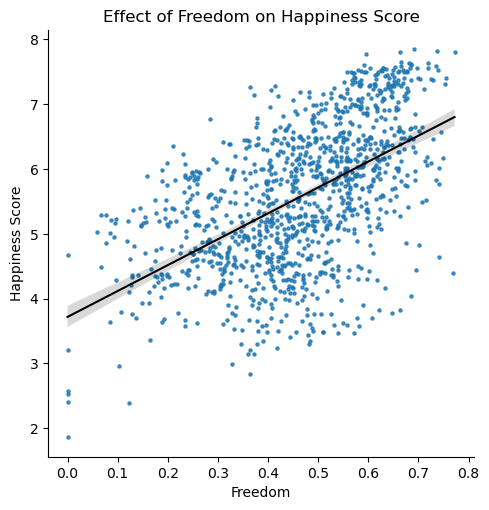

In [11]:
# Creates a scatterplot in seaborn with the 'freedom' and 'happiness_score' variables from the 'sub' dataframe
sns.lmplot(
    x = 'freedom', 
    y = 'happiness_score', 
    data = sub, 
    scatter_kws={'s': 5}, 
    line_kws={'color': 'black', 'linewidth': 1.5}
)

# Assigns plot labels
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.title('Effect of Freedom on Happiness Score') 

- Correlation coefficient = 0.55 <br><br>

- This scatterplot indicates that there is a moderate positive linear relationship between a country's level of freedom and its happiness score <br><br>

- In other words: the freer people are, the happier they tend to be <br><br>

- "Freedom" refers to the degree of personal and political freedom and autonomy individuals have within a country

### 2f. Happiness Score vs Government Trust

Text(0.5, 1.0, 'Effect of Government Trust on Happiness Score')

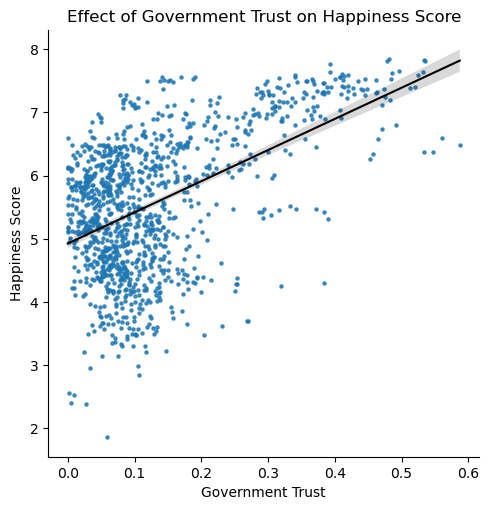

In [12]:
# Creates a scatterplot in seaborn with the 'govt_trust' and 'happiness_score' variables from the 'sub' dataframe
sns.lmplot(
    x = 'govt_trust', 
    y = 'happiness_score', 
    data = sub, 
    scatter_kws={'s': 5}, 
    line_kws={'color': 'black', 'linewidth': 1.5}
)

# Assigns plot labels
plt.xlabel('Government Trust')
plt.ylabel('Happiness Score')
plt.title('Effect of Government Trust on Happiness Score') 

- Correlation coefficient = 0.51 <br><br>

- This scatterplot indicates that there is a weak positive linear relationship between the trust a given country's population has in its government and that country's happiness score <br><br>

- In other words: generally speaking, people are happier when they feel they can trust their government <br><br>

- "Government Trust" refers to the level of trust or lack of trust in a country's government institutions, and perceptions of corruption within those institutions

### 2g. Happiness Score vs Generosity

Text(0.5, 1.0, 'Effect of Generosity on Happiness Score')

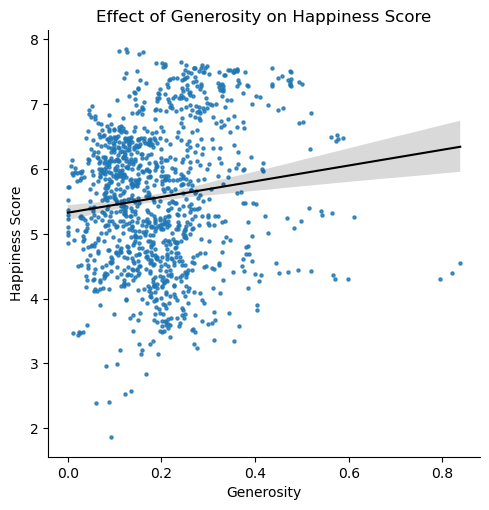

In [13]:
# Creates a scatterplot in seaborn with the 'generosity' and 'happiness_score' variables from the 'sub' dataframe
sns.lmplot(
    x = 'generosity', 
    y = 'happiness_score', 
    data = sub, 
    scatter_kws={'s': 5}, 
    line_kws={'color': 'black', 'linewidth': 1.5}
)

# Assigns plot labels
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title('Effect of Generosity on Happiness Score') 

- Correlation coefficient = 0.13 <br><br>

- This means that there is a minimal and almost negligible association between the level of generosity and a country's happiness score <br><br>

- "Generosity" refers to the willingness of individuals in a country to help others and contribute to social causes

### 2h. Economic Status vs Life Expectancy

Text(0.5, 1.0, 'Effect of Economic Status on Life Expectancy')

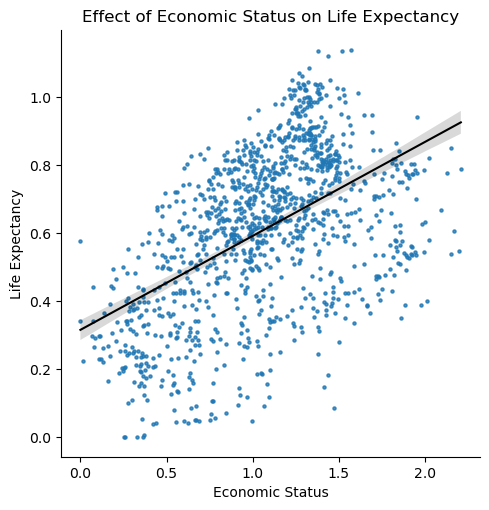

In [14]:
# Creates a scatterplot in seaborn with the 'economic_status' and 'life_expectancy' variables from the 'sub' dataframe
sns.lmplot(
    x = 'economic_status', 
    y = 'life_expectancy', 
    data = sub, 
    scatter_kws={'s': 5}, 
    line_kws={'color': 'black', 'linewidth': 1.5}
)

# Assigns plot labels
plt.xlabel('Economic Status')
plt.ylabel('Life Expectancy')
plt.title('Effect of Economic Status on Life Expectancy') 

- Correlation coefficient = 0.51 <br><br>

- This scatterplot indicates that there is a moderate positive linear relationship between a country's economic status and its life expectancy score <br><br>

- In other words: countries whose economic status is higher tend to have populations that are healthier and live longer <br><br>

- "Economic Status" refers to a country's economic performance and prosperity, typically represented by the Gross Domestic Product (GDP) per capita <br><br>

- "Life Expectancy" refers to the average number of years a person can expect to live in good health, often used as an indicator of overall well-being and healthcare quality

### 2i. Social Support vs Life Expectancy

Text(0.5, 1.0, 'Effect of Social Support on Life Expectancy')

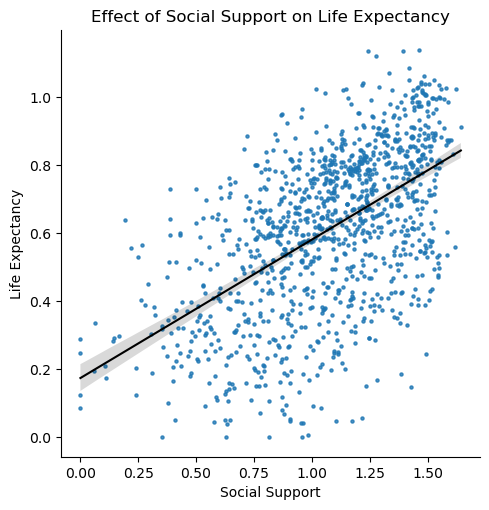

In [15]:
# Creates a scatterplot in seaborn with the 'social_support' and 'life_expectancy' variables from the 'sub' dataframe
sns.lmplot(
    x = 'social_support', 
    y = 'life_expectancy', 
    data = sub, 
    scatter_kws={'s': 5}, 
    line_kws={'color': 'black', 'linewidth': 1.5}
)

# Assigns plot labels
plt.xlabel('Social Support')
plt.ylabel('Life Expectancy')
plt.title('Effect of Social Support on Life Expectancy') 

- Correlation coefficient = 0.55 <br><br>

- This scatterplot indicates that there is a moderate positive linear relationship between a country's level of social support and its life expectancy score <br><br>

- In other words: people with higher levels of social support tend to be healthier and live longer <br><br>

- "Social Support" refers to the extent to which social networks, family, and friends provide a support system for individuals in a country <br><br>

- "Life Expectancy" refers to the average number of years a person can expect to live in good health, often used as an indicator of overall well-being and healthcare quality

***
## 3) Creating a pair plot

In [16]:
# Defines a list of desired variables for use in the pair plot

sub_2 = sub[['happiness_score', 'economic_status', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'govt_trust']]

Text(0.5, 1.02, 'WHR Data Pair Plot')

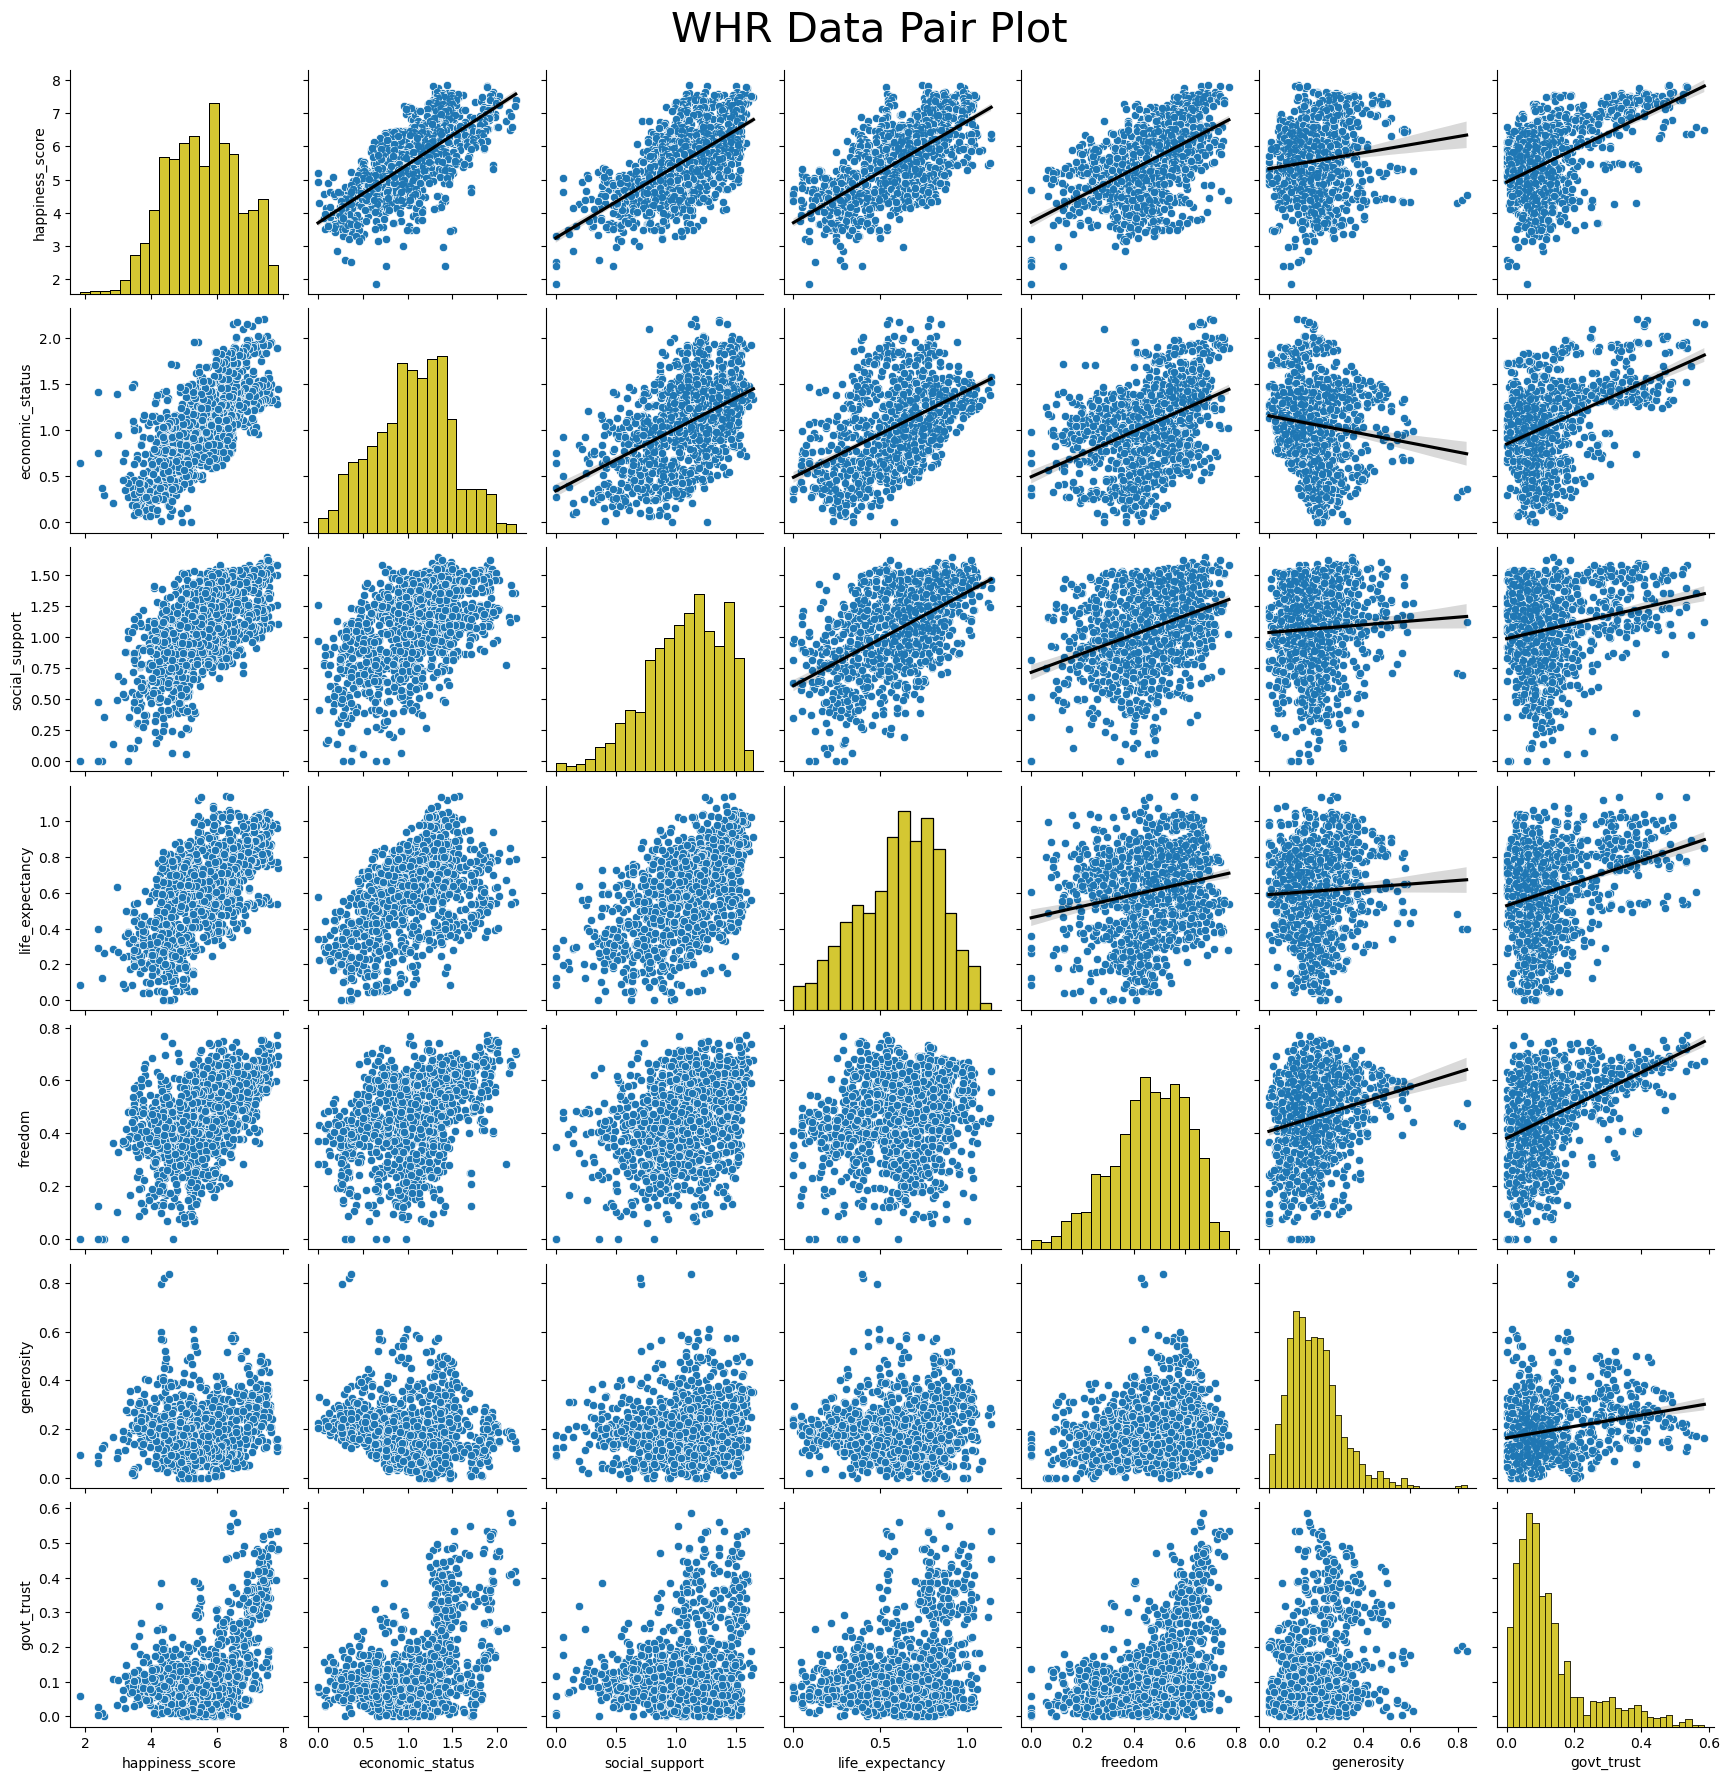

In [17]:
# Creates the pair plot
viz = sns.pairplot(sub_2)

# Adds correlation lines to the scatterplots in the upper triangle
viz.map_upper(sns.regplot, scatter_kws={"s": 1}, line_kws={"color": "black"})

# Customizes diagonal plot appearance
viz.map_diag(sns.histplot, color = 'gold')

# Adds a title
viz.fig.suptitle("WHR Data Pair Plot", y=1.02, size=30)

***
## 4) Creating Variable Categories

### 4a. 'Economic Status' score categories

Text(0.5, 1.0, 'Distribution of Economic Status Scores')

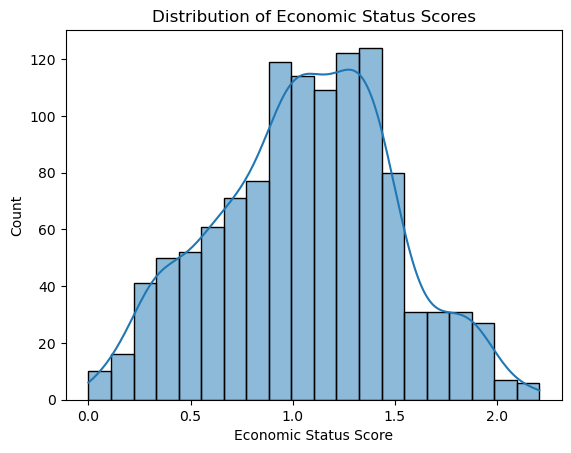

In [18]:
# Creates a histogram to view the distribution of the the 'economic_status' variable
sns.histplot(df['economic_status'], kde = True)

# Sets labels and title
plt.xlabel('Economic Status Score')
plt.ylabel('Count')
plt.title('Distribution of Economic Status Scores')

In [19]:
# Creates a new column, 'economic_status_class', separating economic status scores into categories ('Low', 'Mid', 'High')

df.loc[df['economic_status'] < 0.736, 'economic_status_class'] = 'Low'
df.loc[(df['economic_status'] >= 0.736) & (df['economic_status'] < 1.47), 'economic_status_class'] = 'Mid'
df.loc[df['economic_status'] >= 1.47, 'economic_status_class'] = 'High'

In [20]:
# Counts the values in the new 'economic_status_class' column

df['economic_status_class'].value_counts(dropna = False)

economic_status_class
Mid     725
Low     275
High    179
Name: count, dtype: int64

Text(0.5, 1.0, 'Effect of Economic Status on Happiness Score: Class Distribution')

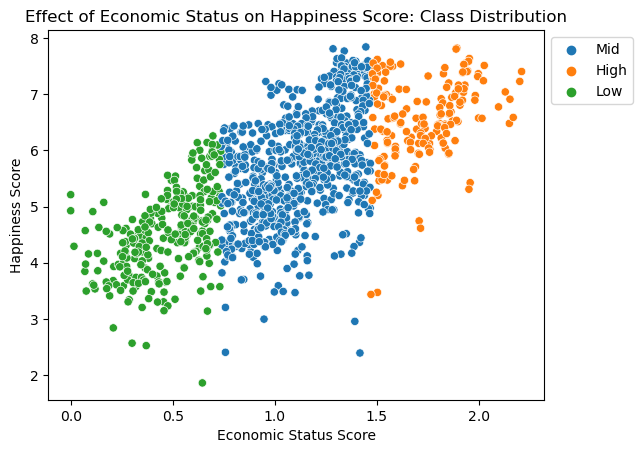

In [21]:
# Creates a categorical plot in seaborn with the 'economic_status' and 'happiness_score' variables from the 'df' dataframe
g = sns.scatterplot(
        x = 'economic_status',                             
        y = 'happiness_score', 
        data = df, 
        hue = 'economic_status_class'
)     

# Move the legend outside the plot
g.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Assigns plot labels
plt.xlabel('Economic Status Score')
plt.ylabel('Happiness Score')
plt.title('Effect of Economic Status on Happiness Score: Class Distribution')

### 4b. 'Life Expectancy' score categories

Text(0.5, 1.0, 'Distribution of Life Expectancy Scores')

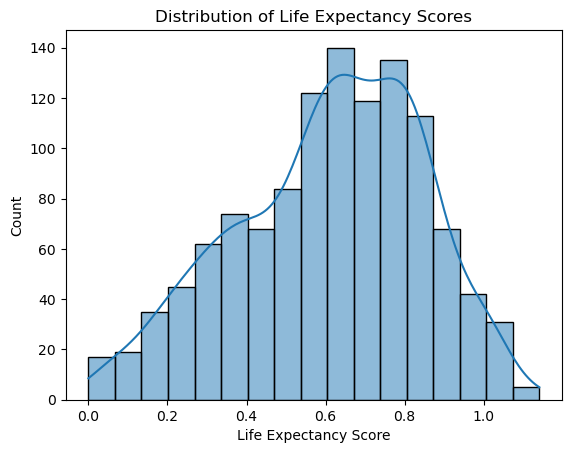

In [22]:
# Creates a histogram to view the distribution of the the 'life_expectancy' variable
sns.histplot(df['life_expectancy'], kde = True)

# Sets labels and title
plt.xlabel('Life Expectancy Score')
plt.ylabel('Count')
plt.title('Distribution of Life Expectancy Scores')

In [23]:
# Creates a new column, 'life_expectancy_class', separating life expectancy scores into categories ('Low', 'Mid', 'High')

df.loc[df['life_expectancy'] < 0.38, 'life_expectancy_class'] = 'Low'
df.loc[(df['life_expectancy'] >= 0.38) & (df['life_expectancy'] < 0.76), 'life_expectancy_class'] = 'Mid'
df.loc[df['life_expectancy'] >= 0.76, 'life_expectancy_class'] = 'High'

In [24]:
# Counts the values in the new 'life_expectancy_class' column

df['life_expectancy_class'].value_counts(dropna = False)

life_expectancy_class
Mid     597
High    359
Low     223
Name: count, dtype: int64

Text(0.5, 1.0, 'Effect of Life Expectancy on Happiness Score: Class Distribution')

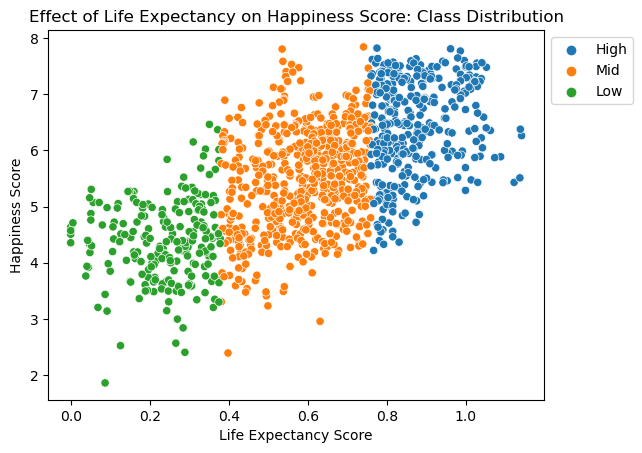

In [25]:
# Creates a categorical plot in seaborn with the 'life_expectancy' and 'happiness_score' variables from the 'df' dataframe
g = sns.scatterplot(
        x = 'life_expectancy',                             
        y = 'happiness_score', 
        data = df, 
        hue = 'life_expectancy_class'
)     

# Move the legend outside the plot
g.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Assigns plot labels
plt.xlabel('Life Expectancy Score')
plt.ylabel('Happiness Score')
plt.title('Effect of Life Expectancy on Happiness Score: Class Distribution')

### 4c. 'Social Support' score categories

Text(0.5, 1.0, 'Distribution of Social Support Scores')

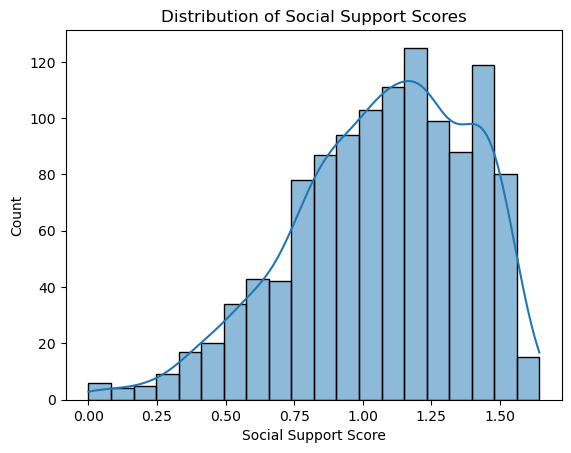

In [26]:
# Creates a histogram to view the distribution of the the 'social_support' variable
sns.histplot(df['social_support'], kde = True)

# Sets labels and title
plt.xlabel('Social Support Score')
plt.ylabel('Count')
plt.title('Distribution of Social Support Scores')

**Note**

- This histogram (illustrating the 'social_support' variable) exhibits a left-skewed distribution, suggesting that the majority of countries have populations that report higher levels of perceived social support, and that a sense of strong social support is a prevailing factor contributing to the overall happiness scores in these countries. <br><br>

- Recall that 'Social Support' refers to the extent to which social networks, family, and friends provide a support system for individuals in a country.

In [27]:
# Creates a new column, 'social_support_class', separating social support scores into categories ('Low', 'Mid', 'High')

df.loc[df['social_support'] < 0.55, 'social_support_class'] = 'Low'
df.loc[(df['social_support'] >= 0.55) & (df['social_support'] < 1.1), 'social_support_class'] = 'Mid'
df.loc[df['social_support'] >= 1.1, 'social_support_class'] = 'High'

In [28]:
# Counts the values in the new 'social_support_class' column

df['social_support_class'].value_counts(dropna = False)

social_support_class
High    587
Mid     507
Low      85
Name: count, dtype: int64

Text(0.5, 1.0, 'Effect of Social Support on Happiness Score: Class Distribution')

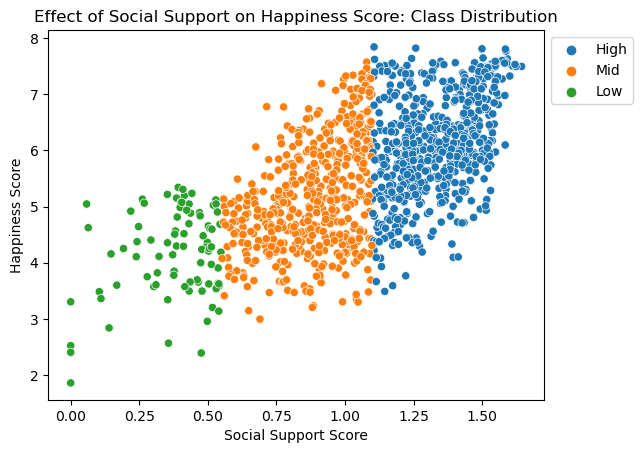

In [29]:
# Creates a categorical plot in seaborn with the 'social_support' and 'happiness_score' variables from the 'df' dataframe
g = sns.scatterplot(
        x = 'social_support',                             
        y = 'happiness_score', 
        data = df, 
        hue = 'social_support_class'
)     

# Move the legend outside the plot
g.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Assigns plot labels
plt.xlabel('Social Support Score')
plt.ylabel('Happiness Score')
plt.title('Effect of Social Support on Happiness Score: Class Distribution')

### 4d. 'Freedom' score categories

Text(0.5, 1.0, 'Distribution of Freedom Scores')

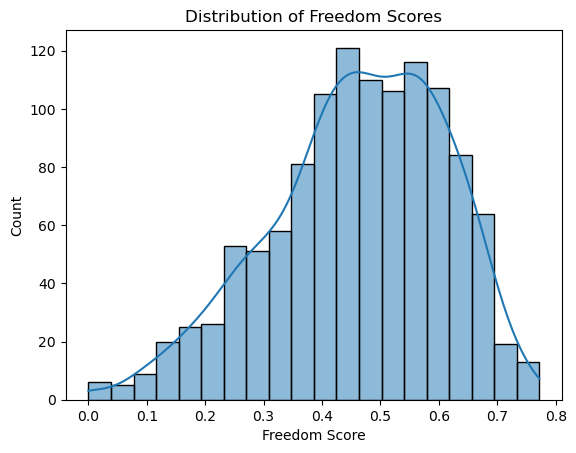

In [30]:
# Creates a histogram to view the distribution of the the 'freedom' variable
sns.histplot(df['freedom'], kde = True)

# Sets labels and title
plt.xlabel('Freedom Score')
plt.ylabel('Count')
plt.title('Distribution of Freedom Scores')

**Note**

- The histogram illustrating the 'freedom' variable exhibits a left-skewed distribution, suggesting that most countries have populations with higher reported levels of perceived freedom, and that a sense of freedom is a relatively prevalent factor contributing to the overall happiness scores in these countries.  <br><br>

- Recall that 'Freedom' refers to the degree of personal and political freedom and autonomy individuals have within a country.

In [31]:
# Creates a new column, 'freedom_class', separating freedom scores into categories ('Low', 'Mid', 'High')

df.loc[df['freedom'] < 0.257, 'freedom_class'] = 'Low'
df.loc[(df['freedom'] >= 0.257) & (df['freedom'] < 0.515), 'freedom_class'] = 'Mid'
df.loc[df['freedom'] >= 0.515, 'freedom_class'] = 'High'

In [32]:
# Counts the values in the new 'freedom_class' column

df['freedom_class'].value_counts(dropna = False)

freedom_class
Mid     579
High    472
Low     128
Name: count, dtype: int64

Text(0.5, 1.0, 'Effect of Freedom on Happiness Score: Class Distribution')

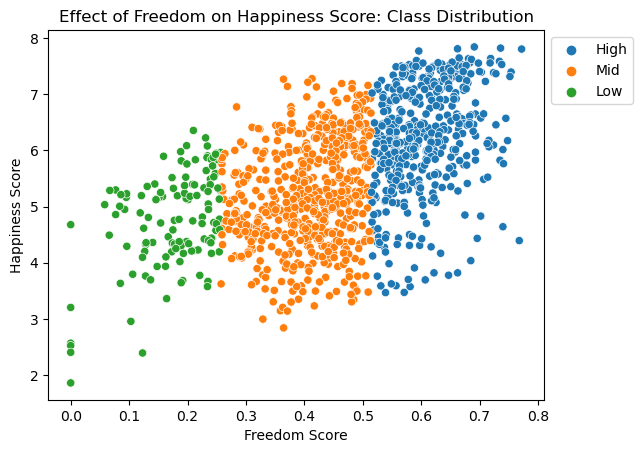

In [33]:
# Creates a categorical plot in seaborn with the 'freedom' and 'happiness_score' variables from the 'df' dataframe
g = sns.scatterplot(
        x = 'freedom',                             
        y = 'happiness_score', 
        data = df, 
        hue = 'freedom_class'
)     

# Move the legend outside the plot
g.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Assigns plot labels
plt.xlabel('Freedom Score')
plt.ylabel('Happiness Score')
plt.title('Effect of Freedom on Happiness Score: Class Distribution')

### 4e. 'Government Trust' score categories

Text(0.5, 1.0, 'Distribution of Government Trust Scores')

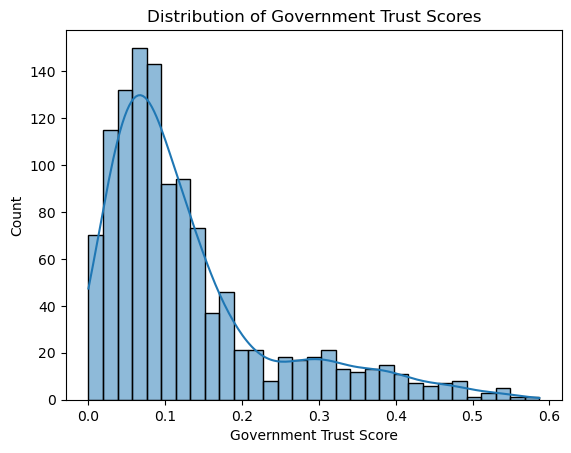

In [34]:
# Creates a histogram to view the distribution of the the 'govt_trust' variable
sns.histplot(df['govt_trust'], kde = True)

# Sets labels and title
plt.xlabel('Government Trust Score')
plt.ylabel('Count')
plt.title('Distribution of Government Trust Scores')

**Note**

- This histogram (illustrating the 'govt_trust' variable) exhibits a significant right-skewed distribution, suggesting that a majority of countries have populations with relatively lower reported levels of perceived corruption, and that perceptions of corruption might play a lesser role in influencing overall happiness compared to other contributing factors. <br><br>

- Recall that 'Government Trust' refers to the level of trust or lack of trust in a country's government institutions, and perceptions of corruption within those institutions.

In [35]:
# Creates a new column, 'govt_trust_class', separating government trust scores into categories ('Low', 'Mid', 'High')

df.loc[df['govt_trust'] < 0.257, 'govt_trust_class'] = 'Low'
df.loc[(df['govt_trust'] >= 0.257) & (df['govt_trust'] < 0.515), 'govt_trust_class'] = 'Mid'
df.loc[df['govt_trust'] >= 0.515, 'govt_trust_class'] = 'High'

In [36]:
# Counts the values in the new 'govt_trust_class' column

df['govt_trust_class'].value_counts(dropna = False)

govt_trust_class
Low     1013
Mid      157
High       9
Name: count, dtype: int64

Text(0.5, 1.0, 'Effect of Government Trust on Happiness Score: Class Distribution')

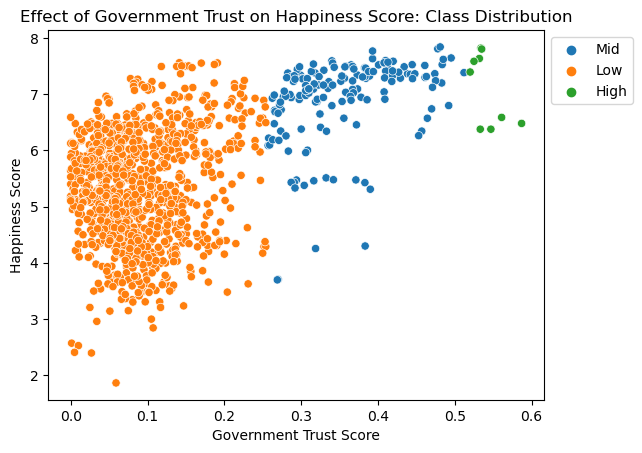

In [37]:
# Creates a categorical plot in seaborn with the 'govt_trust' and 'happiness_score' variables from the 'df' dataframe
g = sns.scatterplot(
        x = 'govt_trust',                             
        y = 'happiness_score', 
        data = df, 
        hue = 'govt_trust_class'
)     

# Move the legend outside the plot
g.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Assigns plot labels
plt.xlabel('Government Trust Score')
plt.ylabel('Happiness Score')
plt.title('Effect of Government Trust on Happiness Score: Class Distribution')

### 4f. 'Generosity' score categories

Text(0.5, 1.0, 'Distribution of Generosity Scores')

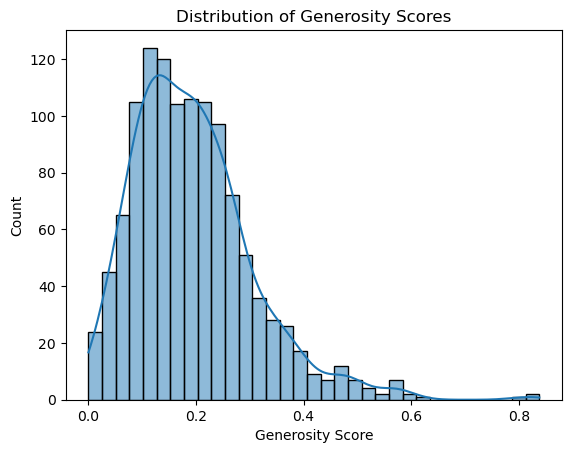

In [38]:
# Creates a histogram to view the distribution of the the 'generosity' variable
sns.histplot(df['generosity'], kde = True)

# Sets labels and title
plt.xlabel('Generosity Score')
plt.ylabel('Count')
plt.title('Distribution of Generosity Scores')

**Note**

- This histogram (illustrating the 'generosity' variable) exhibits a significant right-skewed distribution, suggesting that a majority of countries have populations with relatively lower reported levels of perceived generosity, and that perceptions of generosity might play a lesser role in influencing overall happiness compared to other contributing factors. <br><br>

- Recall that 'Generosity' refers to the willingness of individuals in a country to help others and contribute to social causes.

In [39]:
# Creates a new column, 'generosity_class', separating generosity scores into categories ('Low', 'Mid', 'High')

df.loc[df['generosity'] < 0.279, 'generosity_class'] = 'Low'
df.loc[(df['generosity'] >= 0.279) & (df['generosity'] < 0.559), 'generosity_class'] = 'Mid'
df.loc[df['generosity'] >= 0.559, 'generosity_class'] = 'High'

In [40]:
# Counts the values in the new 'generosity_class' column

df['generosity_class'].value_counts(dropna = False)

generosity_class
Low     966
Mid     200
High     13
Name: count, dtype: int64

Text(0.5, 1.0, 'Effect of Generosity on Happiness Score: Class Distribution')

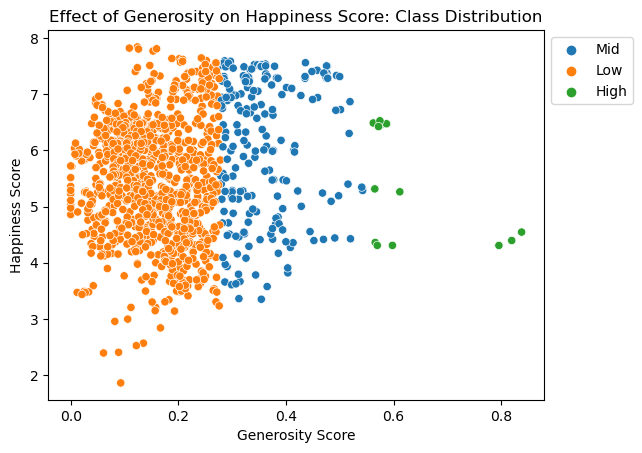

In [41]:
# Creates a categorical plot in seaborn with the 'generosity' and 'happiness_score' variables from the 'df' dataframe
g = sns.scatterplot(
        x = 'generosity',                             
        y = 'happiness_score', 
        data = df, 
        hue = 'generosity_class'
)     

# Move the legend outside the plot
g.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Assigns plot labels
plt.xlabel('Generosity Score')
plt.ylabel('Happiness Score')
plt.title('Effect of Generosity on Happiness Score: Class Distribution')

***
## 5) Observations

### 5a. Regarding the 'economic_status' variable

- The relatively high correlation coefficient of 0.7 suggests that a country's economic status has a substantial influence on its happiness score. I observed that improvements in economic status are associated with better placement within the happiness rankings each year, which supports the common understanding that higher economic well-being contributes to higher levels of happiness. <br><br>

- While the correlation coefficient indicates a strong relationship, correlation does not imply causation. Other factors not accounted for in my analysis could also be influencing both economic status and happiness score. Therefore, I will need to interpret the results in the context of other relevant variables and consider potential causal relationships. <br><br>

- To better understand the causal relationship between a country's economic status and its happiness score, further research and/or additional analyses are needed. Exploring potential mediating factors or considering the influence of other unmeasured variables could provide a more comprehensive picture. <br><br>

- There is also an interesting correlation between economic status and life expectancy (0.51 correlation coefficient) that bears further investigation. It seems to indicate that countries with higher economic status tend to experience longer life expectancies, suggesting a potential link between wealth and well-being.

### 5b. Regarding the 'life_expectancy' variable

- The correlation coefficient of 0.66 between life expectancy and happiness score indicates a moderately strong linear relationship. This implies that life expectancy plays a significant role in determining a country's happiness score. Nations with longer life expectancies are more likely to score higher in happiness due to the positive impact of improved health and well-being. <br><br>

- Correlation does not equal causation. Longer life expectancy could lead to greater happiness, or it's possible that happier societies naturally have better health outcomes. Investigating causality requires more in-depth analysis or additional data. <br><br>

### 5c. Regarding the 'social_support' variable

- The relatively high correlation coefficient of 0.64 implies that social support has a notable influence on a country's happiness score. My analysis indicates that scoring higher on 'social support' is linked to a better happiness score, highlighting the importance of strong social networks and connections in contributing to well-being. <br><br>

- While social support is correlated with happiness score, it's possible that higher happiness leads to stronger social networks or that other underlying factors influence both variables. A more thorough analysis could provide clearer insights.   <br><br>

- There is also an interesting correlation between social support and life expectancy (0.55 correlation coefficient) that bears further investigation. It seems to indicate that stronger social support networks may contribute to increased life expectancy, suggesting a potential connection between interpersonal relationships and overall well-being. 

### 5d. Regarding the 'freedom' variable

- The correlation coefficient of 0.55 between freedom and happiness score indicates a moderate negative linear relationship. This implies that freedom plays a moderate role in influencing a country's happiness score. Nations with greater freedom are more likely to score higher in happiness due to the positive effect of individual liberties and autonomy. <br><br>

- The correlation underscores the importance of personal freedom and individual rights in contributing to overall happiness. Societies that prioritize freedom of choice and expression may experience higher well-being among their citizens. <br><br>

- The World Happiness Report doesn't necessarily measure the degree of freedom a population enjoys, but rather how a country's population feels about its current level of freedom. There could be cultural, political, and social factors influencing the relationship between a country's freedom and its happiness score. Discovering such contextual insights could provide a deeper understanding of the observed correlation.

### 5e. Regarding the 'govt_trust'  variable

- The correlation coefficient of 0.51 between government trust and happiness score indicates a moderate positive linear relationship. This suggests that government trust plays a moderate role in influencing a country's happiness score, and that nations with greater trust in their government institutions are more likely to score higher in happiness due to the positive effect of political stability and effective governance. <br><br>

- Correlation does not equal causation. To gain a more comprehensive understanding of how government trust impacts a country's overall happiness, a more in-depth investigation is required. 

### 5f. Regarding the 'generosity' variable

- The correlation coefficient of 0.13 between generosity and happiness score indicates a very weak positive linear relationship. This suggests that there is little to no meaningful linear correlation between the two variables. <br><br>

- The low correlation coefficient implies that generosity has a minimal impact on a country's happiness score. Generosity alone may not strongly influence the overall happiness level of a nation. <br><br>

- While the correlation is weak, it's important to consider potential complex interactions or indirect effects that might not be captured by a simple linear correlation analysis. Other factors or interactions could be at play. It's possible that higher happiness could lead to increased generosity or that both variables are influenced by other underlying factors that collectively impact overall levels of happiness. 

***
## 6) Hypothesis

- *Economic status is the primary driver of a country's happiness score, suggesting that a higher GDP per capita leads directly to greater overall happiness.*

***
## 7) Organizing & exporting the modified dataframe

In [42]:
# Views the current df organization

df.head()

,country,year,happiness_rank,happiness_score,economic_status,social_support,life_expectancy,freedom,generosity,govt_trust,economic_status_class,life_expectancy_class,social_support_class,freedom_class,govt_trust_class,generosity_class
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,Mid,High,High,High,Mid,Mid
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,Mid,High,High,High,Low,Mid
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,Mid,High,High,High,Mid,Mid
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,Mid,High,High,High,Mid,Mid
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,Mid,High,High,High,Mid,Mid


In [43]:
# Defines a list containing the desired column order
df_column_order = [
    'country', 
    'year', 
    'happiness_rank',
    'happiness_score',
    'economic_status',
    'economic_status_class',
    'life_expectancy',
    'life_expectancy_class',
    'social_support',
    'social_support_class',
    'freedom',
    'freedom_class',
    'govt_trust',
    'govt_trust_class',
    'generosity',
    'generosity_class'
]

# Modifies the column order of the 'df' dataframe
df = df[df_column_order]

In [44]:
# Defines a list containing columns for decimal modification
columns_to_modify = ['happiness_score', 'economic_status', 'life_expectancy', 'social_support', 'freedom', 'govt_trust', 'generosity']

# Loops through the specidied columns and rounds all values to 3 decimal points
for column in columns_to_modify:
    df[column] = df[column].round(3)

In [45]:
# Views the resulting changes
df.head()

,country,year,happiness_rank,happiness_score,economic_status,economic_status_class,life_expectancy,life_expectancy_class,social_support,social_support_class,freedom,freedom_class,govt_trust,govt_trust_class,generosity,generosity_class
0,Switzerland,2015,1,7.587,1.397,Mid,0.941,High,1.350,High,0.666,High,0.420,Mid,0.297,Mid
1,Iceland,2015,2,7.561,1.302,Mid,0.948,High,1.402,High,0.629,High,0.141,Low,0.436,Mid
2,Denmark,2015,3,7.527,1.325,Mid,0.875,High,1.361,High,0.649,High,0.484,Mid,0.341,Mid
3,Norway,2015,4,7.522,1.459,Mid,0.885,High,1.331,High,0.670,High,0.365,Mid,0.347,Mid
4,Canada,2015,5,7.427,1.326,Mid,0.906,High,1.323,High,0.633,High,0.330,Mid,0.458,Mid


In [46]:
# Exports the modified dataframe (whr_combined + class columns)

# df.to_csv(r'C:\Users\ingra\OneDrive\Desktop\whr_df_whr2.csv', index=False)